In [1]:
from FRCfuncs import *
import os
import numpy as np
import matplotlib

In [2]:
wdir = r'N:\Singlem\singlem19-2\April\18_Calibrations_NV\PowerSeries'
#wdir = r'N:\Singlem\singlem19-2\April\18_Calibrations_NV\10micros'

In [3]:
os.chdir(wdir)
files = [k for k in os.listdir() if 'ptu' in k]

In [4]:
files

['20nmCrimson_000pct.ptu',
 '20nmCrimson_010pct.ptu',
 '20nmCrimson_020pct.ptu',
 '20nmCrimson_030pct.ptu',
 '20nmCrimson_040pct.ptu',
 '20nmCrimson_050pct.ptu',
 '20nmCrimson_060pct.ptu',
 '20nmCrimson_070pct.ptu',
 '20nmCrimson_080pct.ptu',
 '20nmCrimson_090pct.ptu',
 '20nmCrimson_100pct.ptu']

In [5]:
smallAnglesLst = ['']*11
smallAnglesLst

['', '', '', '', '', '', '', '', '', '', '']

header dir already exists
b'header\\20nmCrimson_000pct.txt'
number of records is 1766933
header\20nmCrimson_000pct.txt
total image intensity is 695102
overwriting result in existing folder


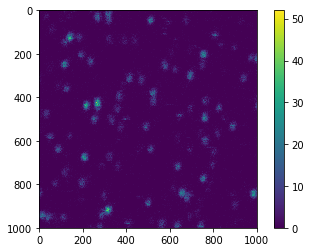

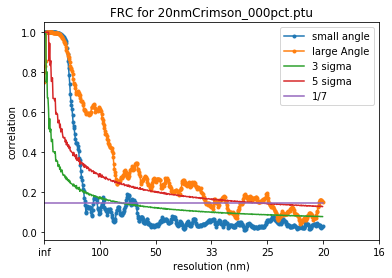

retrieved resolution for 20nmCrimson_000pct.ptu is: 34nm

header dir already exists
b'header\\20nmCrimson_010pct.txt'
number of records is 631063
header\20nmCrimson_010pct.txt
total image intensity is 158016
overwriting result in existing folder


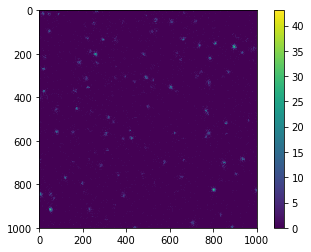

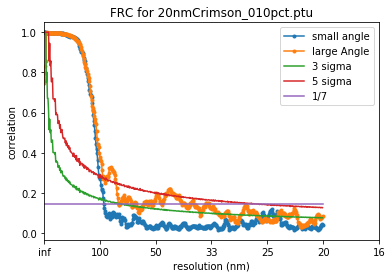

retrieved resolution for 20nmCrimson_010pct.ptu is: 75nm

header dir already exists
b'header\\20nmCrimson_020pct.txt'
number of records is 402102
header\20nmCrimson_020pct.txt
total image intensity is 84606
overwriting result in existing folder


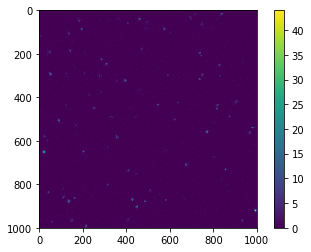

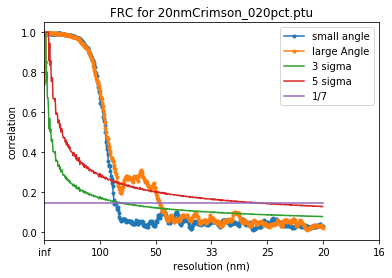

retrieved resolution for 20nmCrimson_020pct.ptu is: 48nm

header dir already exists
b'header\\20nmCrimson_030pct.txt'
number of records is 357123
header\20nmCrimson_030pct.txt
total image intensity is 71065
overwriting result in existing folder


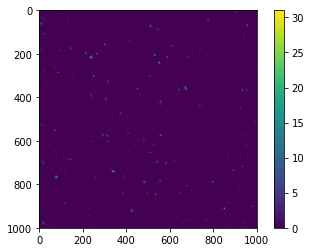

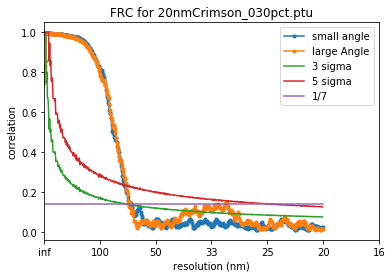

retrieved resolution for 20nmCrimson_030pct.ptu is: 66nm

header dir already exists
b'header\\20nmCrimson_040pct.txt'
number of records is 326632
header\20nmCrimson_040pct.txt
total image intensity is 64762
overwriting result in existing folder


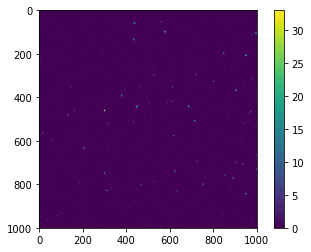

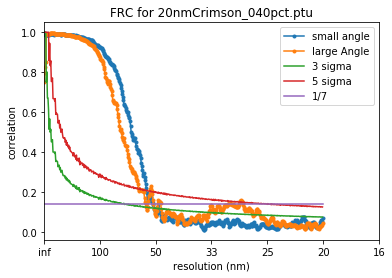

retrieved resolution for 20nmCrimson_040pct.ptu is: 55nm

header dir already exists
b'header\\20nmCrimson_050pct.txt'
number of records is 359109
header\20nmCrimson_050pct.txt
total image intensity is 71040
overwriting result in existing folder


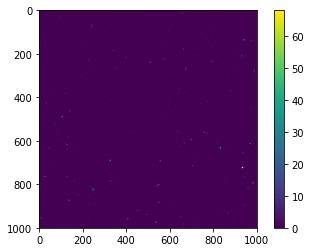

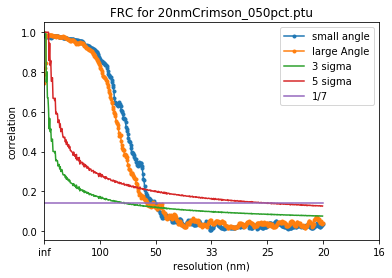

retrieved resolution for 20nmCrimson_050pct.ptu is: 54nm

header dir already exists
b'header\\20nmCrimson_060pct.txt'
number of records is 326446
header\20nmCrimson_060pct.txt
total image intensity is 66516
overwriting result in existing folder


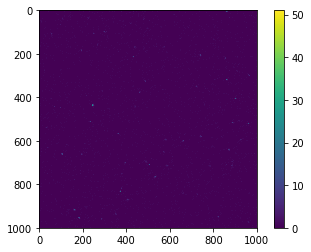

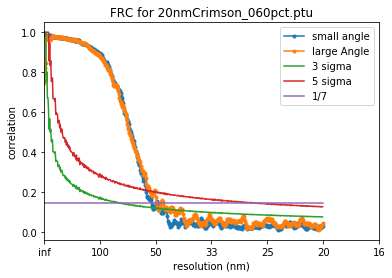

retrieved resolution for 20nmCrimson_060pct.ptu is: 50nm

header dir already exists
b'header\\20nmCrimson_070pct.txt'
number of records is 309558
header\20nmCrimson_070pct.txt
total image intensity is 64091
overwriting result in existing folder


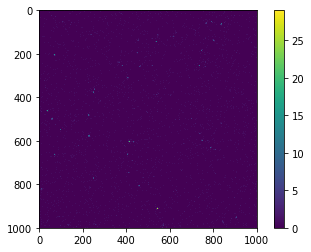

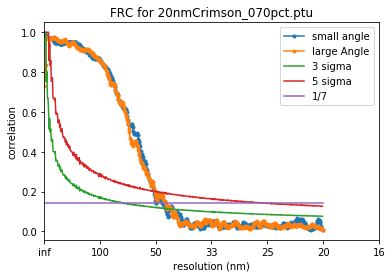

retrieved resolution for 20nmCrimson_070pct.ptu is: 46nm

header dir already exists
b'header\\20nmCrimson_080pct.txt'
number of records is 314016
header\20nmCrimson_080pct.txt
total image intensity is 65827
overwriting result in existing folder


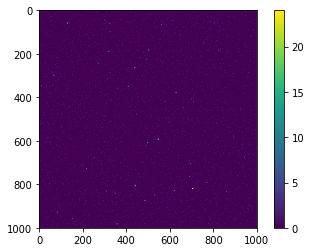

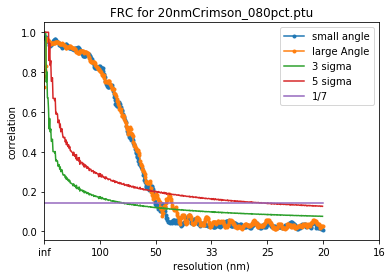

retrieved resolution for 20nmCrimson_080pct.ptu is: 48nm

header dir already exists
b'header\\20nmCrimson_090pct.txt'
number of records is 317069
header\20nmCrimson_090pct.txt
total image intensity is 70675
overwriting result in existing folder


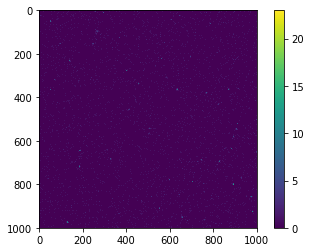

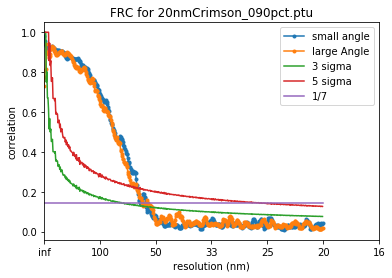

retrieved resolution for 20nmCrimson_090pct.ptu is: 57nm

header dir already exists
b'header\\20nmCrimson_100pct.txt'
number of records is 330705
header\20nmCrimson_100pct.txt
total image intensity is 72867
overwriting result in existing folder


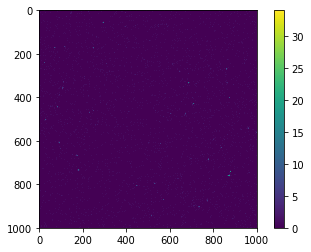

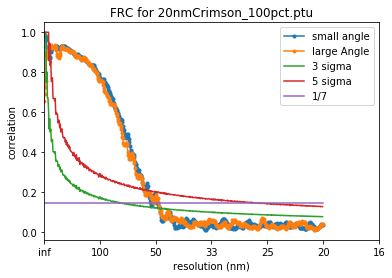

retrieved resolution for 20nmCrimson_100pct.ptu is: 49nm



In [6]:
smallAnglesLst = ['']*11
resLst = ['']*11
for i, file in enumerate(files):
    imA, imB = genImABfromptu(file.encode('utf-8'),uselines = np.ones(5, dtype = np.byte), xbinning = 5, ybinning = 5)
    plt.imshow(imA+imB)
    plt.colorbar()
    plt.show()
    smallAnglesLst[i], largeAngles, threeSigma, fiveSigma, resLst[i], largeAngleResolution = FRCAnalysis(
        imA, imB, 10, theta = np.pi/4, title = file, correctDrift = False)
    

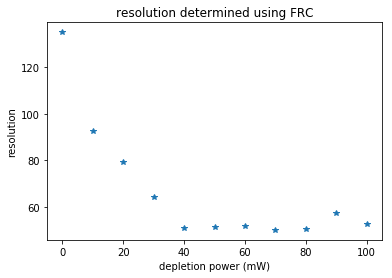

In [9]:
resarr = np.zeros(11)
for i, el in enumerate(resLst):
    resarr[i] = el[0,0]

powers = np.linspace(0,100,11)
plt.plot(powers, resarr, '*')
plt.title('resolution determined using FRC')
plt.xlabel('depletion power (mW)')
plt.ylabel('resolution')
plt.savefig(r'K:\vanderVoortN\FRC\analysisNotebooks\FRCon20nmCrimson.png', dpi = 300)

In [10]:
import imageio
imageio.imwrite('test.tiff', imA)

C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality mig

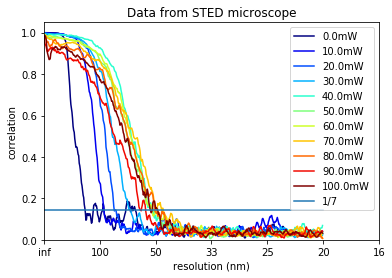

In [12]:
cmap = matplotlib.cm.get_cmap('jet')
for i, el in enumerate(smallAnglesLst):
    plt.plot(el, color = cmap(i/10), label = str(powers[i]) + 'mW')
    
pixelSize = 10
d = threeSigma.shape[0]    
plt.gca().set_xlim(left = 0)
plt.gca().set_ylim(bottom = 0)
#set custom x ticks
locs, labels = plt.xticks()

plt.plot(np.ones(d) / 7, label = '1/7')

for i in range(locs.shape[0]):
    if locs[i] == 0:
        labels[i] = 'inf'
    else:
        labels[i] = (2 * d * pixelSize / locs[i]).astype(np.int)
plt.xticks(locs, labels)
plt.legend()
plt.title('Data from STED microscope')
plt.ylabel('correlation')
plt.xlabel('resolution (nm)')
plt.savefig(r'K:\vanderVoortN\FRC\analysisNotebooks\FRCCurveson20nmCrimson.png', dpi = 300)

## Gaussian MLE Fitting in Ani

In [25]:
class dataset():
    "Stores spots width data"
    def __init__(self, fname):
        self.fname = fname
        #to be filled later
        self.data = None
        self.intensity = None
        self.chi2 = None
        self.sigma = None
        self.Ncounts = None
        self.avgSigma = None
        self.SpreadOnSigma = None

In [26]:
wdir = r'N:\Singlem\singlem19-2\April\18_Calibrations_NV\PowerSeries'
data = []
data.append(dataset(os.path.join(wdir,'20nmCrimson_000pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_010pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_020pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_030pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_040pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_050pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_060pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_070pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_080pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_090pct\Colocalization Fit results/Red Photons_Fit results.cla4')))
data.append(dataset(os.path.join(wdir,'20nmCrimson_100pct\Colocalization Fit results/Red Photons_Fit results.cla4')))

In [249]:
chi2Range = [0.67, 1.5]
trimNvalues = 2
verbose = False
for i in range(11):
    data[i].data  = np.genfromtxt(data[i].fname, delimiter = '\t', skip_header = 1)
    #check all elements in list and delete those with chi2 outside chi2Range 
    #This is done to get rid of bad fits
    l = []
    for j in range(data[i].data.shape[0]):
        if (data[i].data[j,5] > chi2Range[0] and data[i].data[j,5] < chi2Range[1]):
            l.append(j)
        elif verbose:
            print("data %d at position %d has a bad chi2" % (i,j))
#    #remove the lowest and highest few values from list. The amount of removed values is indicated by trimIntensity
#    intensity_tmp = data[i].data[l, 4]
#    intensity_tmp.sort()
#    m = []
#    for j, el in enumerate(data[i].data[l, 4]):
#        pos = np.where( el == intensity_tmp)[0][0]
#        if (pos < trimIntensity or pos >= intensity_tmp.shape[0] - trimIntensity):
#            m.append(j)
#    m.sort()
#    for el in reversed(m):
#        l.pop(el)
    for col in [8, 9]:
        col_tmp = data[i].data[l, col]
        col_tmp.sort()
        m = []
        for j, el in enumerate(data[i].data[l, col]):
            pos = np.where( el == col_tmp)[0][0]
            if (pos < trimNvalues or pos >= col_tmp.shape[0] - trimNvalues):
                m.append(j)
        m.sort()
        for el in reversed(m):
            l.pop(el)
    #assign selected rows
    data[i].intensity = data[i].data[l, 4]
    data[i].chi2 = data[i].data[l, 5]
    data[i].sigma = data[i].data[l, 8:10]
    data[i].Ncounts = data[i].data[l, 13]
    data[i].avgSigma = np.mean(data[i].sigma, axis = 0)
    data[i].SpreadOnSigma = np.std(data[i].sigma, axis = 0)

([array([10., 12., 17.,  7.,  3.,  3.,  3.,  1.,  0.,  0.]),
  array([ 5., 20., 12.,  7.,  3.,  2.,  2.,  4.,  0.,  1.])],
 array([27.9247445 , 33.49512575, 39.065507  , 44.63588825, 50.2062695 ,
        55.77665075, 61.347032  , 66.91741325, 72.4877945 , 78.05817575,
        83.628557  ]),
 <a list of 2 Lists of Patches objects>)

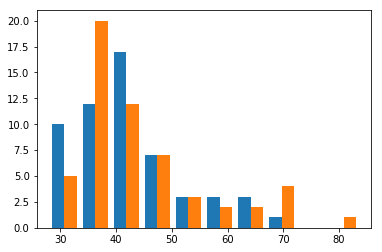

In [263]:
plt.hist(data[10].sigma*23.5, bins = 10)

In [254]:
avgSigmaArr = np.zeros([11,2])
SpreadOnSigmaArr = np.zeros([11,2])
for i in range(11):
    avgSigmaArr[i] = data[i].avgSigma
    SpreadOnSigmaArr[i] = data[i].SpreadOnSigma

In [353]:
def inversesqrt(x, ConfocalRes, Is):
    return ConfocalRes/np.sqrt(1+x/Is)
def fitSTEDpower(STEDpower, STEDresolution, p0 = (240,10), sigma = None):
    return curve_fit(inversesqrt, STEDpower, STEDresolution, p0 = p0, sigma = sigma)

In [354]:
popt, pcov = fitSTEDpower(powers, avgSigmaArr[:,0], sigma = SpreadOnSigmaArr[:,0])
fitxres = inversesqrt(powers, popt[0], popt[1])
print("Confocal Resolution in x is %.3f nm and STED Saturation power is %.3f mW" %(popt[0]*factor, popt[1]))
popt, pcov = fitSTEDpower(powers, avgSigmaArr[:,1], sigma = SpreadOnSigmaArr[:,0])
fityres = inversesqrt(powers, popt[0], popt[1])
print("Confocal Resolution in y is %.3f nm and STED Saturation power is %.3f mW" %(popt[0]*factor, popt[1]))

Confocal Resolution in x is 218.446 nm and STED Saturation power is 3.304 mW
Confocal Resolution in y is 296.438 nm and STED Saturation power is 1.914 mW


C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


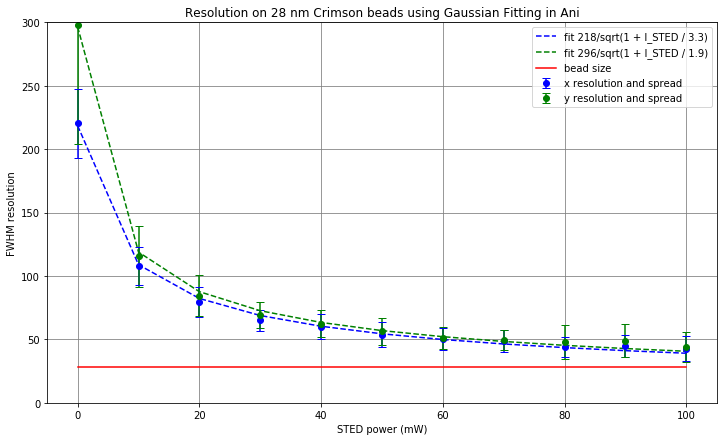

In [360]:
powers = np.arange(11)*10
Sigma2FWHM = 2.35
PixelSize = 10
factor = PixelSize * Sigma2FWHM
plt.errorbar(powers, avgSigmaArr[:,0]*factor, yerr = SpreadOnSigmaArr[:,0]*factor, label = 'x resolution and spread',
             fmt = 'bo', capsize = 4)
plt.errorbar(powers, avgSigmaArr[:,1]*factor, yerr = SpreadOnSigmaArr[:,1]*factor, label = 'y resolution and spread',
             fmt = 'go', capsize = 4)
plt.plot(powers, fitxres*factor, 'b--', label = 'fit 218/sqrt(1 + I_STED / 3.3)')
plt.plot(powers, fityres*factor, 'g--', label = 'fit 296/sqrt(1 + I_STED / 1.9)')
plt.plot(powers,[28]*11, 'r', label = 'bead size')
ax = plt.gca()
#ax.set_yscale('log')
ax.set_ylim(bottom = 0, top = 300)
plt.legend()
plt.grid(b=True, which = 'both', color='gray', linestyle='-')
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.ylabel('FWHM resolution')
plt.xlabel('STED power (mW)')
plt.title('Resolution on 28 nm Crimson beads using Gaussian Fitting in Ani')
plt.savefig('20nmCrimsonFWHM.png', dpi = 300)

In [348]:
np.sqrt((avgSigmaArr*factor)**2-28**2)

array([[218.49008539, 296.51469759],
       [104.15681469, 111.93220382],
       [ 74.42155073,  79.59991294],
       [ 58.67721711,  63.36594203],
       [ 52.92004072,  55.80802106],
       [ 45.8890527 ,  48.78476009],
       [ 42.12086174,  42.93100863],
       [ 39.86809056,  41.13377478],
       [ 33.76714735,  38.94520404],
       [ 35.01871618,  40.07170485],
       [ 32.26119348,  34.4194154 ]])

In [361]:
os.getcwd()

'N:\\Singlem\\singlem19-2\\April\\18_Calibrations_NV\\PowerSeries'

In [349]:
avgSigmaArr*factor

array([[220.27691076, 297.83378903],
       [107.85472658, 115.38118673],
       [ 79.51457233,  84.3809584 ],
       [ 65.01550436,  69.27656609],
       [ 59.87095047,  62.43825121],
       [ 53.756908  ,  56.24902503],
       [ 50.57832534,  51.25496563],
       [ 48.71821677,  49.75929488],
       [ 43.86593485,  47.96591413],
       [ 44.83648607,  48.88498266],
       [ 42.71749764,  44.36999162]])

In [11]:
file = os.path.join(wdir, '20nmCrimson_100pct.ptu')
imA, imB = genImABfromptu(file.encode('utf-8'),uselines = np.ones(5, dtype = np.byte), xbinning = 5, ybinning = 5)


header dir already exists
b'N:\\Singlem\\singlem19-2\\April\\18_Calibrations_NV\\PowerSeries\\header\\20nmCrimson_100pct.txt'
number of records is 330705
N:\Singlem\singlem19-2\April\18_Calibrations_NV\PowerSeries\header\20nmCrimson_100pct.txt
total image intensity is 72867
overwriting result in existing folder


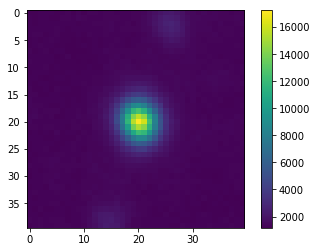

In [49]:
plt.imshow(np.fft.fftshift(np.real(imAB))[480:520,480:520])
plt.colorbar()

In [19]:
def Hamming(w,h):
    alpha = 0.50
    beta = 1-alpha
    xv = alpha - beta * np.cos(2*np.pi / (w-1) * np.arange(w))
    yv = alpha - beta * np.cos(2*np.pi / (h-1) * np.arange(h))
    hamming = np.zeros([w,h])
    for i in range(h):
        hamming[i] = xv * yv[i]
    return hamming

In [20]:
file = os.path.join(wdir, '20nmCrimson_000pct.ptu')
imA, imB = genImABfromptu(file.encode('utf-8'),uselines = np.ones(5, dtype = np.byte), xbinning = 5, ybinning = 5)
Hm = Hamming(1000,1000)
fftA = np.fft.fft2(imA*Hm)
fftB = np.fft.fft2(imB*Hm)
fftAB = fftA * np.conj(fftB)
imAB = np.fft.ifft2(fftAB)


header dir already exists
b'N:\\Singlem\\singlem19-2\\April\\18_Calibrations_NV\\PowerSeries\\header\\20nmCrimson_000pct.txt'
number of records is 1766933
N:\Singlem\singlem19-2\April\18_Calibrations_NV\PowerSeries\header\20nmCrimson_000pct.txt
total image intensity is 695102
overwriting result in existing folder


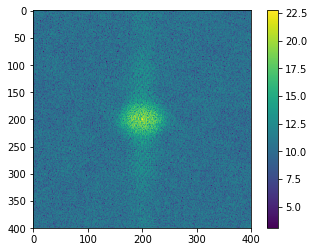

In [21]:
plt.imshow(np.fft.fftshift(np.log(abs(fftAB)))[300:700,300:700])
plt.colorbar()

## 1D plot to support DFG antrag Claus dd 12 June 2019

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from FRCfuncs import *
from scipy.optimize import curve_fit
import os

In [4]:
ydat = [0.0000,0.0000,0.0000,0.3941,0.5550,1.2147,2.2275,3.0074,10.3347,19.8403,19.6095,14.0846,3.9262,1.0417,
0.4215,0.0985,0.0000,0.5094,0.1060,0.0000,0.0000,0.2161,0.0737,1.2535,2.0890,1.8077,5.9722,15.9369,
23.8982,27.4362,20.5610,6.5865,5.3632,1.2741,0.2546,0.8301,0.2212,0.0000,0.0000,0.0000] #from imageJ linecut
xdat = np.arange(len(ydat))*10 #10nm pixel size

In [5]:
def oneD_Gaussian(xdat, amplitude, xo, sigma):

    xo = float(xo)  
    g = amplitude*np.exp( - (xdat-xo)**2/(2*sigma**2))
    return g
popt1, pcov1 = curve_fit(oneD_Gaussian, xdat[:20], ydat[:20], p0 = (20, 100, 20) )
popt2, pcov2 = curve_fit(oneD_Gaussian, xdat[20:], ydat[20:], p0 = (20, 100, 20) )

In [6]:
fit1 = oneD_Gaussian(np.arange(200), *popt1)
fit2 = oneD_Gaussian(np.arange(190)+200, *popt2)

In [7]:
print(popt1)
print(popt2)

[21.27539596 96.26035303 13.81166281]
[ 27.44093773 286.96805205  15.71985166]


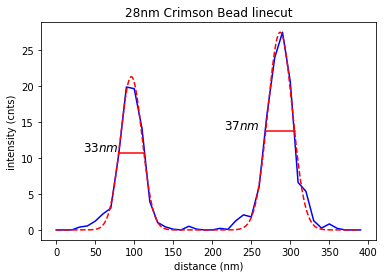

In [8]:
plt.plot(xdat, ydat, 'b')
plt.plot(np.arange(200), fit1, 'r--')
plt.plot(np.arange(190)+200, fit2, 'r--')
plt.plot([popt1[1]-popt1[2]*1.18,popt1[1]+popt1[2]*1.18],[popt1[0]/2,popt1[0]/2],'r-')
plt.text(35, 11, r'$33 nm$', fontsize=12)
plt.plot([popt2[1]-popt2[2]*1.18,popt2[1]+popt2[2]*1.18],[popt2[0]/2,popt2[0]/2],'r-')
plt.text(215, 14, r'$37 nm$', fontsize=12)
plt.xlabel('distance (nm)')
plt.ylabel('intensity (cnts)')
plt.title('28nm Crimson Bead linecut')
plt.savefig('20190612linecut.png', dpi = 300)

In [15]:
wdir = r'K:\vanderVoortN\reports\20190605 STED DFG\resolution_figure'
np.savetxt(os.path.join(wdir,'xdat.txt'), xdat, delimiter = '\t')
np.savetxt(os.path.join(wdir,'xdat2.txt'), np.arange(390), delimiter = '\t')
np.savetxt(os.path.join(wdir,'ydat.txt'), ydat, delimiter = '\t')
np.savetxt(os.path.join(wdir,'fit1.txt'), fit1, delimiter = '\t')
np.savetxt(os.path.join(wdir,'fit2.txt'), fit2, delimiter = '\t')

In [17]:
[popt2[1]-popt2[2]*1.18,popt2[1]+popt2[2]*1.18],[popt2[0]/2,popt2[0]/2]

([268.4186270873194, 305.5174770068771],
 [13.720468863573899, 13.720468863573899])